# Diffraction Map Generation Example

This example demonstrates the capability of **Nookiin** to generate diffraction maps for multilayer systems. Unlike traditional diffraction patterns that only indicate the location of Bragg peaks, diffraction maps represent the continuous intensity distribution across reciprocal space. These maps are constructed by summing Lorentzian contributions centered at each reciprocal lattice point, producing a smooth image where high-intensity regions correspond to constructive interference.

The example shows how to compute, visualize, and export such maps, comparing different systems to highlight the influence of stacking, twist angles, and interlayer complexity.

### Loading System

Loading the required functions is done by importing nookiin and, with it, all the functions from nookiin.system. To do this, you must have already installed nookiin using the `pip install` command from the console.

In [1]:
import sys
import os

import nookiin
from nookiin.system import *

VASP_Files = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VASP_Files'))

Load System
Nookiin Ready-to-work


## Twisted Bilayer Graphene at 2.65°

In [2]:
g1 = graphene()
g2 = graphene().mRot(2.65)
S1 = System([g1,g2])

Supercell calculation for the system.

Size of the primitive vectors: |a|=48.61666Å, |b|=48.61666Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |  11   12|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  794   |
|        Graphene         |  | -12   23|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  10   13|  |  | 0.99979 -0.00230|  |   -0.136% // +0.11°   |  798   |
|    Graphene(2.65°)'     |  | -13   23|  |  | 0.00230  0.99749|  |   -0.136% // +0.11°   |        |
|                         |               |                       |                       |        |

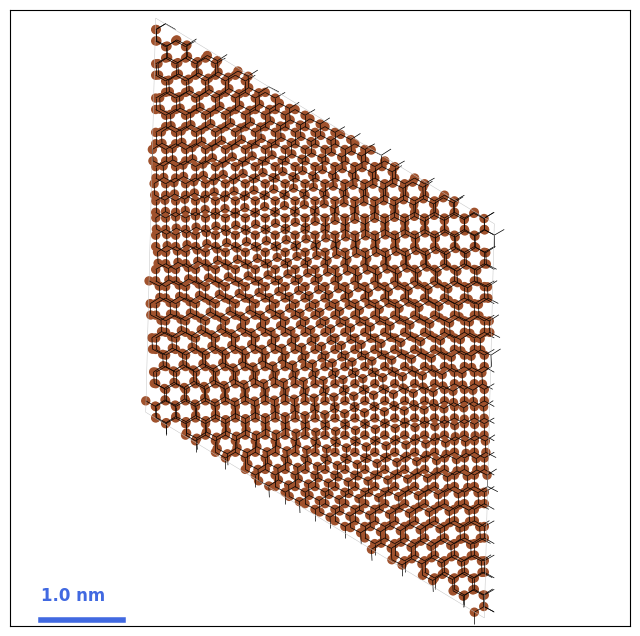

Reciprocal Space:


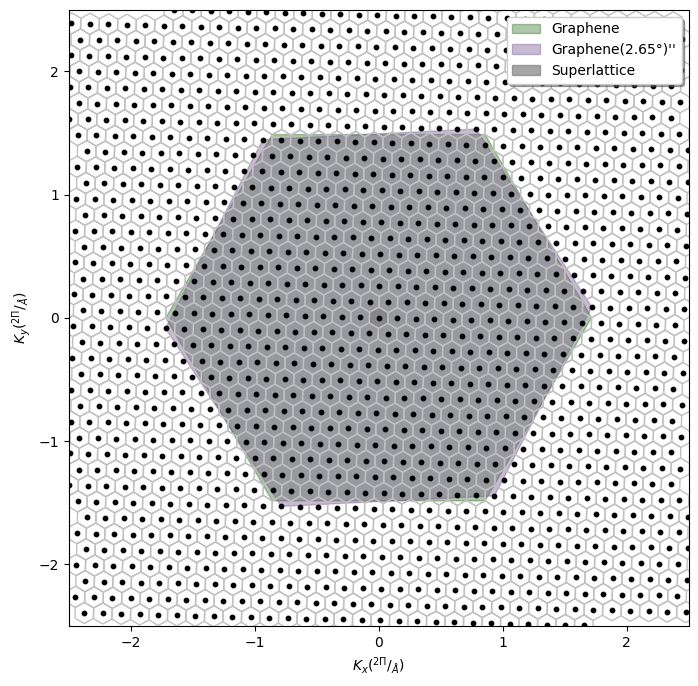

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [13]:
S1 = S1.generateSuperCell(RoS=15, eps=0.01, prntRes=True,showTable=True)

Diffraction Pattern

Calculating diffraction pattern...


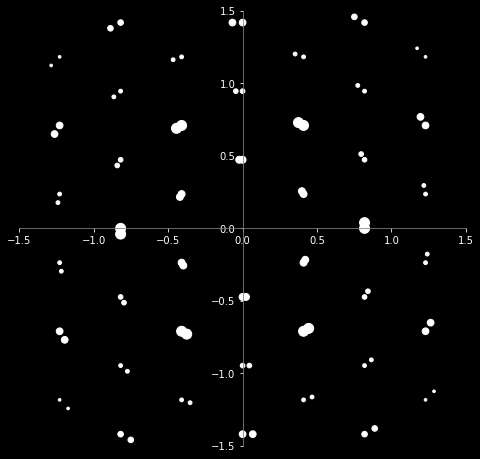

Diffraction pattern complete.


In [4]:
S1.diffractionPattern()

The diffraction map is computed using a Lorentzian distribution with `width=0.005`, a resolution of 300 points, and the result is saved as an image.

Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\English\Images/Difraction-Map_S1(Lorentzian).png'


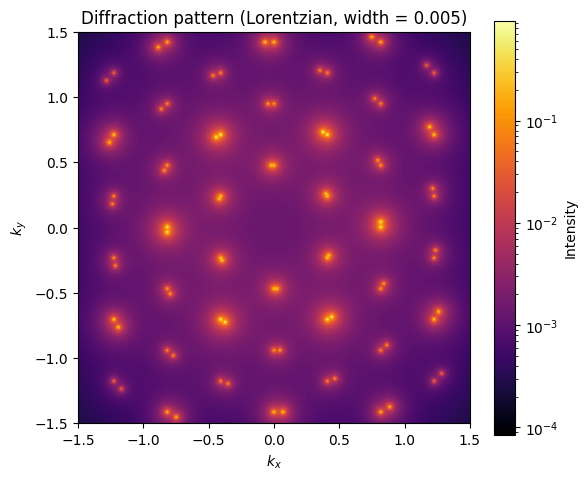

In [5]:
_=S1.plot_diffraction_map(width=0.005, typ="Lorentzian", resolution=300, prnt='Difraction-Map_S1')

## Graphene/hBN Heterostructure at 7.15°

In [6]:
g = importLattice(VASP_Files+"/graphene")
g.name = "Graphene"
hBN = importLattice(VASP_Files+"/hBN")
hBN.name = "h_BN"
S2 = System([g,hBN.mRot(7.15)])

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/graphene.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/hBN.vasp' will be read
--Lattice created successfully


Size of the primitive vectors: |a|=19.58279Å, |b|=19.58279Å
Angle between vectors: 60.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6    9|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  126   |
|        Graphene         |  |  -3    6|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   9    4|  |  | 1.00139 -0.00147|  |   +0.212% // +0.07°   |  122   |
|       h_BN(7.15°)       |  |  -4    5|  |  | 0.00147  1.00286|  |   +0.212% // +0.07°   |        |
|                         |               |                       |                       |        |


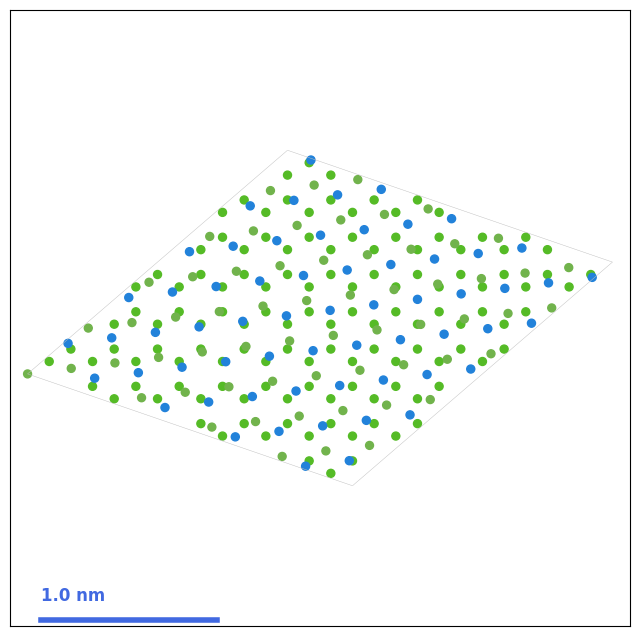

Reciprocal Space:


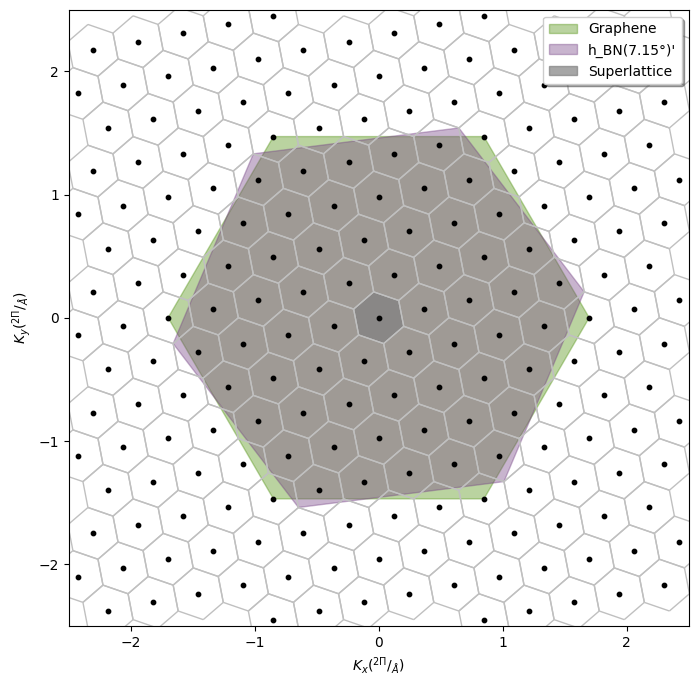

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.
Calculating diffraction pattern...


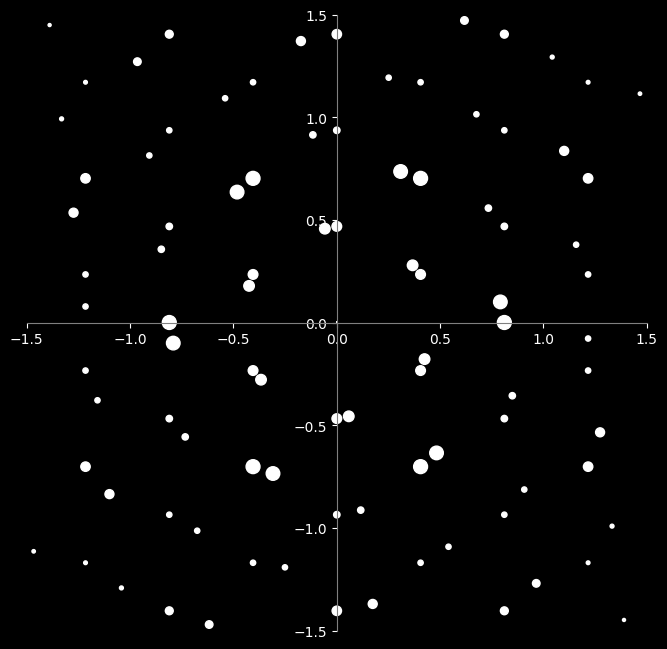

Diffraction pattern complete.


In [7]:
S2 = S2.generateSuperCell(RoS=15, eps=0.01, prntRes=True,showTable=True)
S2.diffractionPattern()

Diffraction map.

In this case, the function `plot_diffraction_map` is executed using default values, and without computing the diffraction pattern in advance. Therefore, the structure factor will be calculated first. Since no value for `width` is given, the function will request it interactively from the user.

Enter the value of width (γ):  0.01


Calculating diffraction pattern....100.00%

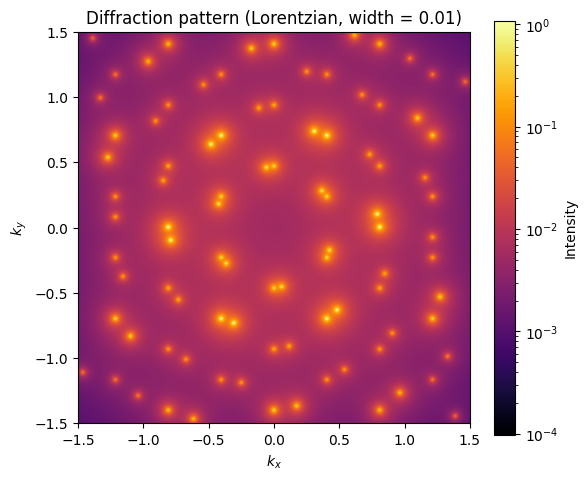

In [8]:
_ = S2.plot_diffraction_map()

## WS₂/hBN(6.37°)/WSe₂(15.24°) Trilayer Heterostructure

In [9]:
WS2 = importLattice(VASP_Files+"/WS2")
hBN = importLattice(VASP_Files+"/hBN")
WSe2 = importLattice(VASP_Files+"/WSe2")
S3 = System([WS2,hBN.mRot(6.37),WSe2.mRot(15.24)])

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/WS2.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/hBN.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/WSe2.vasp' will be read
--Lattice created successfully


Size of the primitive vectors: |a|=55.39805Å, |b|=32.85770Å
Angle between vectors: 27.167°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   1    6|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  288   |
|           WS2           |  | -17   -6|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  21   15|  |  | 0.99248 -0.02038|  |   -1.018% // -0.27°   |  312   |
|       hBN(6.37°)        |  | -23   -9|  |  |-0.00533  0.99026|  |   -1.977% // +1.03°   |        |
|                         |               |                       |                       |        |


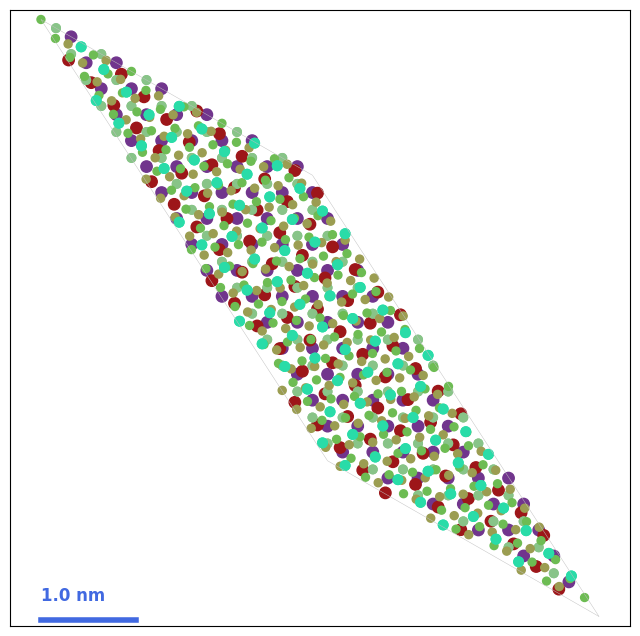

Reciprocal Space:


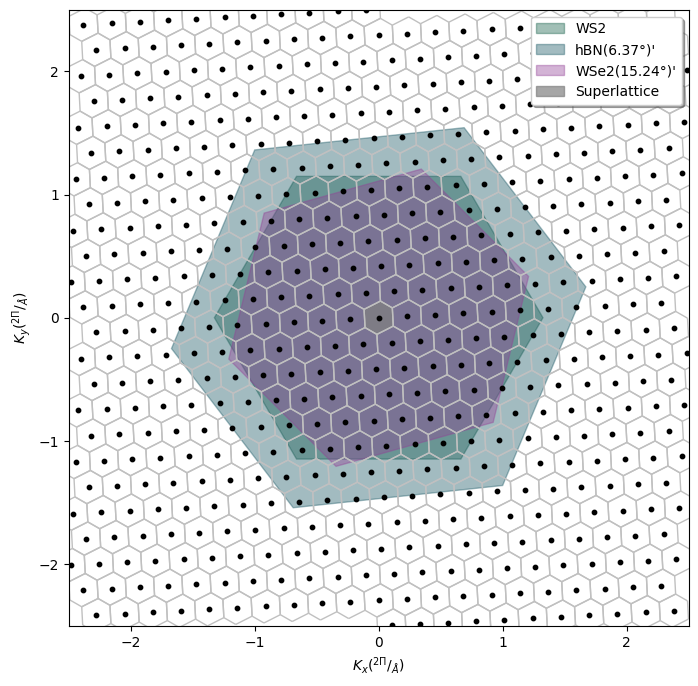

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [10]:
S3=S3.generateSuperCell(RoS=20, eps=0.02, showTable=True)

Diffraction map.

In this case, the `plot_diffraction_map` function will be executed using both **Gaussian** and **Lorentzian** distributions, again without precomputing the diffraction pattern.

As in the previous example, the structure factor will be calculated first. Unlike the Lorentzian case, when using the Gaussian distribution, it is recommended to use a larger `width` value than usual to achieve comparable visibility in the output.

Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\English\Images/DM-S3(Gaussian).png'


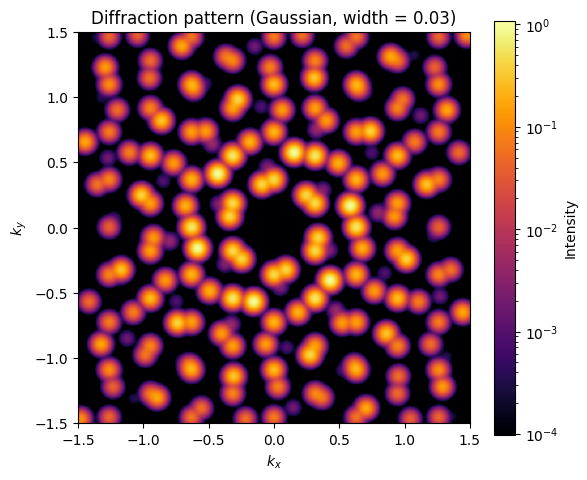

Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\English\Images/DM-S3(Lorentzian).png'


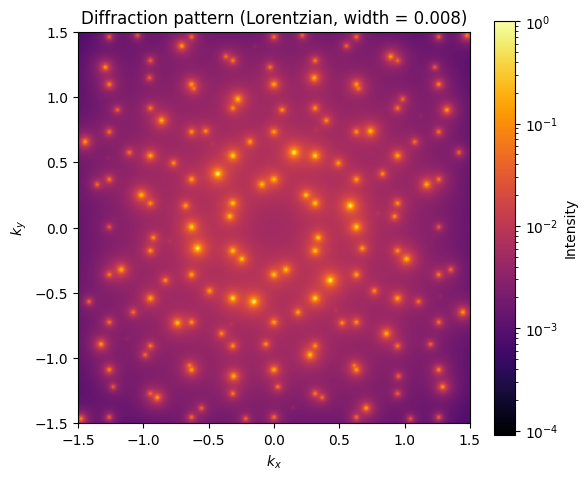

In [12]:
_ = S3.plot_diffraction_map(width=0.03, typ="Gaussian",resolution=300,prnt='DM-S3')
_ = S3.plot_diffraction_map(width=0.008, typ="Lorentzian",resolution=300,prnt='DM-S3')